<a href="https://colab.research.google.com/github/rliu7926/weinstein-ligo-research/blob/main/3.1%20Refined%20Redshifting%20Waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Install the astropy package
! pip install astropy
! pip install -q 'PyCBC==1.15.3' 'lalsuite==6.66'

     |████████████████████████████████| 3.1MB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 28.5MB 155kB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 890kB 40.3MB/s 
     |████████████████████████████████| 1.6MB 41.9MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 3.2MB 48.2MB/s 


In [ ]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import pylab

## Define FLRW parameters

cosmo = FlatLambdaCDM(H0=67.4, Om0=0.315)

## Make a graph of redshift vs. distance

z = np.arange(-3, 5, 0.01)
redshift = [0] * len(z)

for i in range(len(z)):
  redshift[i] = cosmo.comoving_distance(10**(z[i])).value



Text(0.5, 1.0, 'Planck 2018 Parameter Results')

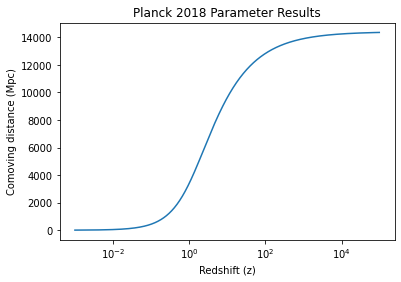

In [ ]:
pylab.plot(10**z, redshift)
pylab.xscale('log')
pylab.xlabel("Redshift (z)")
pylab.ylabel("Comoving distance (Mpc)")
pylab.title("Planck 2018 Parameter Results")

In [ ]:
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

z_at_value(Planck18.comoving_distance, 100 * u.Mpc)

## Make the same graph of redshift vs. distance as above

distance = np.arange(100, 13500, 50) # z_at_value only allows redshifts between 10e-8 and 1000
redshift = [0] * len(distance)

for i in range(len(distance)):
  redshift[i] = z_at_value(cosmo.comoving_distance, distance[i] * u.Mpc)

Text(0.5, 1.0, 'Planck 2018 Parameter Results')

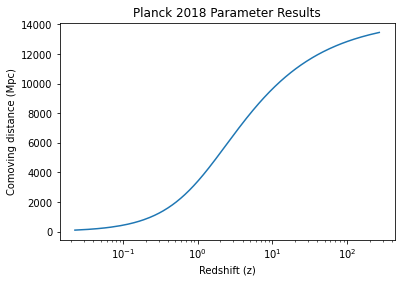

In [ ]:
pylab.plot(redshift, distance)
pylab.xscale('log')
pylab.xlabel("Redshift (z)")
pylab.ylabel("Comoving distance (Mpc)")
pylab.title("Planck 2018 Parameter Results")

In [ ]:
## Modify create_waveform template

## Differences from 2.1: 
## Redshift is updated
## Frequency bound changed to take account of redshift

from pycbc.waveform import get_td_waveform

def create_waveform(mass1, mass2, resolution, frequencybound, distance, cosmology=Planck18):

  redshift = 1 + z_at_value(cosmology.comoving_distance, distance * u.Mpc)
  fbound = frequencybound * redshift

  waveform, waveform_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                                             mass1=mass1,
                                             mass2=mass2,
                                             delta_t=resolution/redshift,
                                             f_lower=fbound)
  
  waveform_amplitude = [0.0] * len(waveform)
  waveform_time = [0.0] * len(waveform)

  for i in range(len(waveform)):
    waveform_amplitude[i] = waveform[i]
    waveform_time[i] = waveform.sample_times[i]

  waveform_amplitude = [i/distance for i in waveform_amplitude]
  waveform_time = [i*redshift for i in waveform_time]

  waveform_amplitude = np.array(waveform_amplitude)
  waveform_time = np.array(waveform_time)

  return waveform_amplitude, waveform_time
  

In [ ]:
amp100, time100 = create_waveform(mass1=30, mass2=30, resolution=1/4096, frequencybound=20, distance=100)
amp300, time300 = create_waveform(mass1=30, mass2=30, resolution=1/4096, frequencybound=20, distance=300)
amp1000, time1000 = create_waveform(mass1=30, mass2=30, resolution=1/4096, frequencybound=20, distance=1000)
amp3000, time3000 = create_waveform(mass1=30, mass2=30, resolution=1/4096, frequencybound=20, distance=3000)


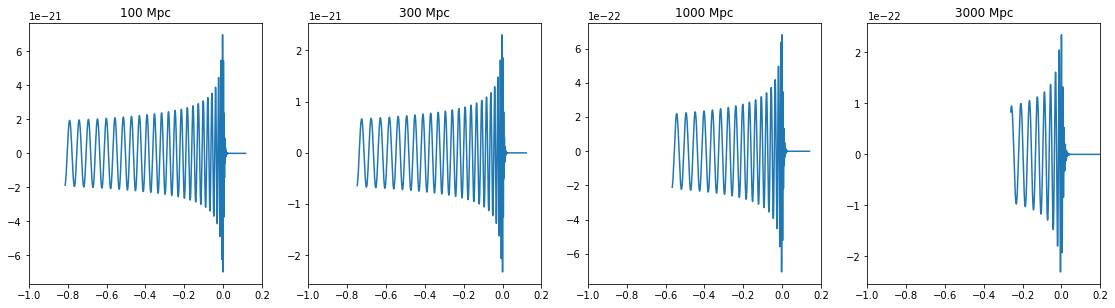

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.subplot(1,4,1)
plt.plot(time100, amp100)
plt.xlim(-1,0.2)
plt.title("100 Mpc")

plt.subplot(1,4,2)
plt.plot(time300, amp300)
plt.xlim(-1,0.2)
plt.title("300 Mpc")

plt.subplot(1,4,3)
plt.plot(time1000, amp1000)
plt.xlim(-1,0.2)
plt.title("1000 Mpc")

plt.subplot(1,4,4)
plt.plot(time3000, amp3000)
plt.xlim(-1,0.2)
plt.title("3000 Mpc")

fig.set_figheight(4.8)
fig.set_figwidth(19.2)

fig.show()